In [55]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import shuffle

In [56]:
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names = column_names)
label_encoder = preprocessing.LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class'])
dataset = shuffle(dataset)

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(dataset)

     sepal-length  sepal-width  petal-length  petal-width  class
129           7.2          3.0           5.8          1.6      2
100           6.3          3.3           6.0          2.5      2
49            5.0          3.3           1.4          0.2      0
35            5.0          3.2           1.2          0.2      0
117           7.7          3.8           6.7          2.2      2
67            5.8          2.7           4.1          1.0      1
61            5.9          3.0           4.2          1.5      1
104           6.5          3.0           5.8          2.2      2
142           5.8          2.7           5.1          1.9      2
77            6.7          3.0           5.0          1.7      1
11            4.8          3.4           1.6          0.2      0
34            4.9          3.1           1.5          0.1      0
103           6.3          2.9           5.6          1.8      2
140           6.7          3.1           5.6          2.4      2
118           7.7        

In [41]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [42]:
print(dataset.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


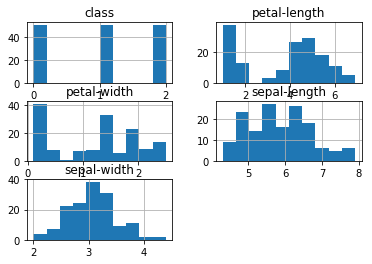

In [43]:
dataset.hist()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


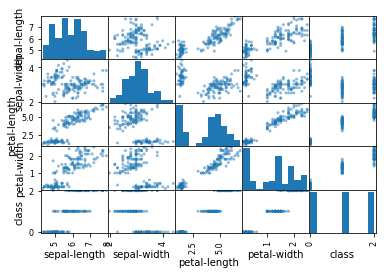

In [44]:
scatter_matrix(dataset)
plt.show()

In [57]:
X = dataset.values[:, 0:4]
Y = dataset['class'].as_matrix()
print(X)
print(Y)

[[ 7.2  3.   5.8  1.6]
 [ 6.3  3.3  6.   2.5]
 [ 5.   3.3  1.4  0.2]
 [ 5.   3.2  1.2  0.2]
 [ 7.7  3.8  6.7  2.2]
 [ 5.8  2.7  4.1  1. ]
 [ 5.9  3.   4.2  1.5]
 [ 6.5  3.   5.8  2.2]
 [ 5.8  2.7  5.1  1.9]
 [ 6.7  3.   5.   1.7]
 [ 4.8  3.4  1.6  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 6.3  2.9  5.6  1.8]
 [ 6.7  3.1  5.6  2.4]
 [ 7.7  2.6  6.9  2.3]
 [ 7.3  2.9  6.3  1.8]
 [ 7.1  3.   5.9  2.1]
 [ 5.6  2.8  4.9  2. ]
 [ 7.2  3.2  6.   1.8]
 [ 6.1  2.6  5.6  1.4]
 [ 5.5  3.5  1.3  0.2]
 [ 5.1  3.8  1.6  0.2]
 [ 4.5  2.3  1.3  0.3]
 [ 5.   3.5  1.6  0.6]
 [ 7.2  3.6  6.1  2.5]
 [ 4.8  3.   1.4  0.1]
 [ 5.5  2.4  3.8  1.1]
 [ 5.   2.   3.5  1. ]
 [ 6.3  2.5  4.9  1.5]
 [ 6.9  3.1  4.9  1.5]
 [ 5.7  4.4  1.5  0.4]
 [ 7.7  3.   6.1  2.3]
 [ 5.   3.6  1.4  0.2]
 [ 5.8  2.6  4.   1.2]
 [ 7.6  3.   6.6  2.1]
 [ 6.9  3.1  5.1  2.3]
 [ 5.1  3.8  1.9  0.4]
 [ 5.6  2.7  4.2  1.3]
 [ 5.7  3.   4.2  1.2]
 [ 5.3  3.7  1.5  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.4  2.9  1.4  0.2]
 [ 6.7  3.3  5.7  2.1]
 [ 5.6  2.5

In [58]:
train_size = 100
X_train = X[:train_size]
Y_train = Y[:train_size]
print(X_train.shape)
print(Y_train.shape)
X_test = X[train_size:]
Y_test = Y[train_size:]
print(X_test.shape)
print(Y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [59]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(predictions)
    print(name)
    print(accuracy_score(predictions, Y_test))

[0 0 0 1 2 0 2 0 2 0 0 2 2 2 2 0 1 0 2 0 0 0 1 2 0 1 1 0 2 1 1 0 1 2 0 2 2
 0 0 1 1 2 0 2 2 1 0 2 0 2]
LR
0.98
[0 0 0 1 2 0 2 0 2 0 0 2 2 2 2 0 1 0 2 0 0 0 1 2 0 1 1 0 2 1 1 0 1 2 0 1 2
 0 0 1 1 2 0 2 2 1 0 2 0 2]
LDA
1.0
[0 0 0 1 2 0 2 0 2 0 0 2 2 2 2 0 1 0 2 0 0 0 1 2 0 1 1 0 2 1 1 0 1 2 0 1 2
 0 0 1 1 2 0 2 2 1 0 2 0 2]
KNN
1.0
[0 0 0 1 2 0 2 0 2 0 0 2 2 2 2 0 1 0 2 0 0 0 1 2 0 1 1 0 2 1 1 0 1 2 0 1 2
 0 0 1 1 1 0 2 2 1 0 2 0 2]
CART
0.98
[0 0 0 1 2 0 2 0 2 0 0 2 2 2 2 0 1 0 2 0 0 0 1 2 0 1 1 0 2 1 1 0 1 2 0 1 2
 0 0 1 1 1 0 2 2 1 0 2 0 2]
NB
0.98
[0 0 0 1 2 0 2 0 2 0 0 2 2 2 2 0 1 0 2 0 0 0 1 2 0 1 1 0 2 1 1 0 1 2 0 1 2
 0 0 1 1 2 0 2 2 1 0 2 0 2]
SVM
1.0
